In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("./dataset/crime.csv")
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [3]:
# Remove unnecessary columns
df = df.drop(['Dispatch_Date_Time','Dispatch_Time'], axis=1)
df.head()

,Dc_Dist,Psa,Dispatch_Date,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [4]:
# Check the number of missing values
df.isnull().sum()

Dc_Dist                  0
Psa                      0
Dispatch_Date            0
Hour                     0
Dc_Key                   0
Location_Block           0
UCR_General            290
Text_General_Code      290
Police_Districts     19401
Month                    0
Lon                  16880
Lat                  16880
dtype: int64

In [5]:
# Check possible values for Police_Districts
np.array(set(df['Police_Districts'].dropna().astype(int)))

array(set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]), dtype=object)

### Visualize geographic borders of Police Districts

In [6]:

df_district = df.dropna(axis=0, how='any', subset=['Police_Districts', 'Lat', 'Lon'])
# Initialize dictionary
districts_dic = dict([(int(dist), []) for dist in df_district.Police_Districts])
# Fill in dictionary
for dist, lon, lat in zip(df_district.Police_Districts, df_district.Lon, df_district.Lat):
    districts_dic[dist].append((lon, lat))

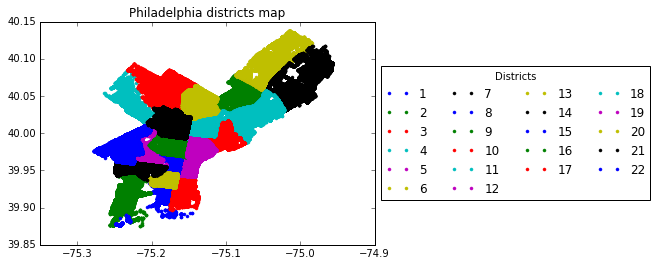

In [7]:
plt.clf()
fig, ax = plt.subplots()
for d in districts_dic.keys():
    lons = np.array(districts_dic[d])[:,0]
    lats = np.array(districts_dic[d])[:,1]
    plt.plot(lons, lats, '.', label=d)
plt.axis('equal')
# Put a legend to the right of the current axis
ax.legend(loc='center left', title='Districts',ncol=4, bbox_to_anchor=(1, 0.5))
plt.title('Philadelphia districts map')

### Number of crimes per month

In [8]:
# Convert Month to datetime Month (needed for plot_date)
df['Month'] = pd.to_datetime(df.Month)
# Extract year and month out of it
df['year'] = df.Month.dt.year
df['month'] = df.Month.dt.month
# Count the number of crimes per (year, month)
counts_per_month = df.groupby(['year', 'month'])['month'].count()
# Convert group to data frame
counts_per_month_df = counts_per_month.to_frame(name='count').reset_index()
counts_per_month_df.head()

,year,month,count
0,2006,1,19359
1,2006,2,15894
2,2006,3,18627
3,2006,4,18940
4,2006,5,20041


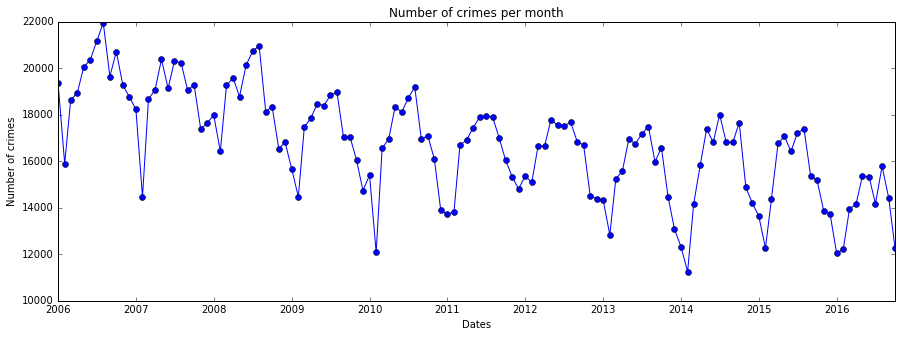

In [9]:
# Display number of crimes per month
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(np.sort(df.Month.unique()), counts_per_month_df['count'], '-o')
ax.set_ylabel('Number of crimes')
ax.set_xlabel('Dates')
ax.set_title('Number of crimes per month')

In [14]:
# Calculate the trendline
order = 2
x = xrange(len(df.Month.unique()))
y = counts_per_month_df['count']

coeffs = np.polyfit(x, y, order) # fit oreder 2 polynomial
trend_fit_func = np.poly1d(coeffs)

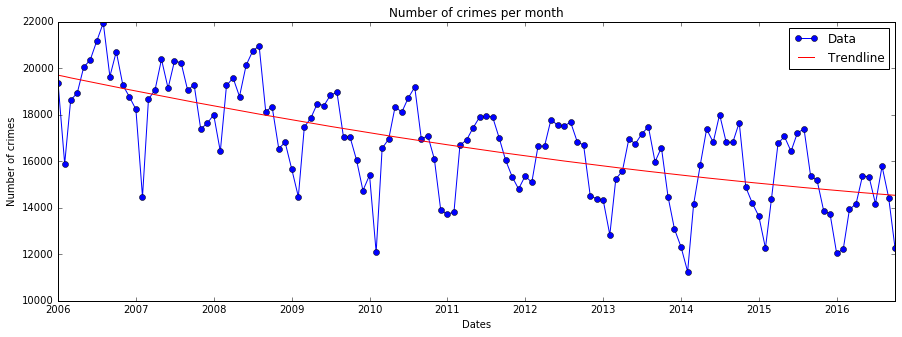

In [18]:
# Display number of crimes per month
plt.clf()
fig, ax = plt.subplots(figsize=(15,5))
plt.plot_date(np.sort(df.Month.unique()), y, '-o', label='Data')
plt.plot_date(np.sort(df.Month.unique()), trend_fit_func(x), 'r-', label='Trendline')
plt.ylabel('Number of crimes')
plt.xlabel('Dates')
plt.title('Number of crimes per month')
plt.legend()

In [ ]:
# TODO: seasonality